# Franchir les frontières académiques : analyse des flux de mobilité des étudiants entrant dans l'enseignement supérieur

Ce projet a été réalisé dans le cadre du cours de 2ème année de l'ENSAE "Python pour la data science" par Mathieu CAMBON, Charlotte HIECQUE et Elise MENSCH. 

## Introduction

### Contexte
La plateforme Parcoursup affecte chaque année des milliers d'étudiants à une formation. Les formations sont nombreuses, et même si certaines ont le même objectif, chacune possède une identité propre pouvant inciter un étudiant à postuler à une formation plutôt qu'une autre, engendrant ainsi une certaine mobilité des étudiants. Pourtant, cette mobilité peut être contrainte par de nombreux facteurs. De plus, elle est inégalement répartie sur le territoire, avec certaines villes qui attirent un grand nombre de personnes tandis que d'autres engendrent une fuite des étudiants, qui se dirigent vers d'autres académies dans le cadre de leurs études supérieures. Il apparaît donc intéressant d'étudier la mobilité des étudiants lors de leur entrée en étude supérieure. Analyse de Parcoursup comme moteur de mobilité territoriale au lieu de l'orientation; 

### Problématique 
Quels sont les facteurs qui encouragent une mobilité lors de l'entrée dans l'éducation supérieure ? 

De manière plus précise, nous allons analyser les mécanismes suivants : 
- La géographie des flux : quels sont les académies qui attirent les étudiants et celles qui, au contraire les repoussent ?
- La mobilité comme une stratégie pour accéder aux formations d'excellence;
- L'offre de formation, notamment la sélectivité et le statut.

### Données
Pour effectuer cette analyse, nous avons principalement utilisé les données parcoursup en opendata sur data.gouv. A partir de cette base que nous avons nettoyé, nous avons créé de nouvelles données afin d'enrichir notre analyse. 

### Plan

## Importation des bases de données et nettoyage

### Importation des librairies nécessaires

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Nettoyage et enrichissement de la base de données

In [11]:
%load_ext autoreload
%autoreload 2

from function import charger_donnees

url_parcoursup2024 = "https://www.data.gouv.fr/api/1/datasets/r/1d916b7c-bd4c-4951-845a-70f7ad7c17db"

df=charger_donnees(url_parcoursup2024)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Chargement du fichier...
Succès 14079 lignes prêtes


## Statistiques descriptives

### Analyse géographique : quels sont les pôles d'attractivité ?

Nous observons tout d'abord les flux entre académies, qui sont les seules données auxquelles nous avons accès en terme de flux. 

Pour éviter des biais pouvant être lié à des caractéristiques propres à l'Ile-de-France, notamment des flux entre les différents départements, nous créons une nouvelle variable qui regroupe les académies de Paris, Créteil et Versailles. 

In [3]:
# Création d'une copie du data frame, spécifique à cette analyse
df_geo = df

# Regroupement de Paris, Créteil et Versailles
df_geo["academie_pcv"] = df_geo["academie"].replace(
    ["Paris", "Créteil", "Versailles"], "Paris-Créteil-Versailles"
)

On calcule ensuite différents indicateurs. 
En regroupant par académie, on calcule le pourcentage de locaux en moyenne.

In [4]:
academies = df_geo.groupby("academie_pcv")["part_bac_ac_pcv"].mean().reset_index()

In [5]:
display(academies.style.background_gradient(cmap="viridis", subset=["part_bac_ac_pcv"]))

,academie_pcv,part_bac_ac_pcv
0,Aix-Marseille,75.592282
1,Amiens,75.747634
2,Besancon,70.237154
3,Bordeaux,70.990369
4,Clermont-Ferrand,61.942857
5,Corse,77.081081
6,Dijon,67.071642
7,Etranger,44.294118
8,Grenoble,73.972835
9,Guadeloupe,89.676923


Passons maintenant à la visualisation graphique.

/tmp/ipykernel_10521/597566750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


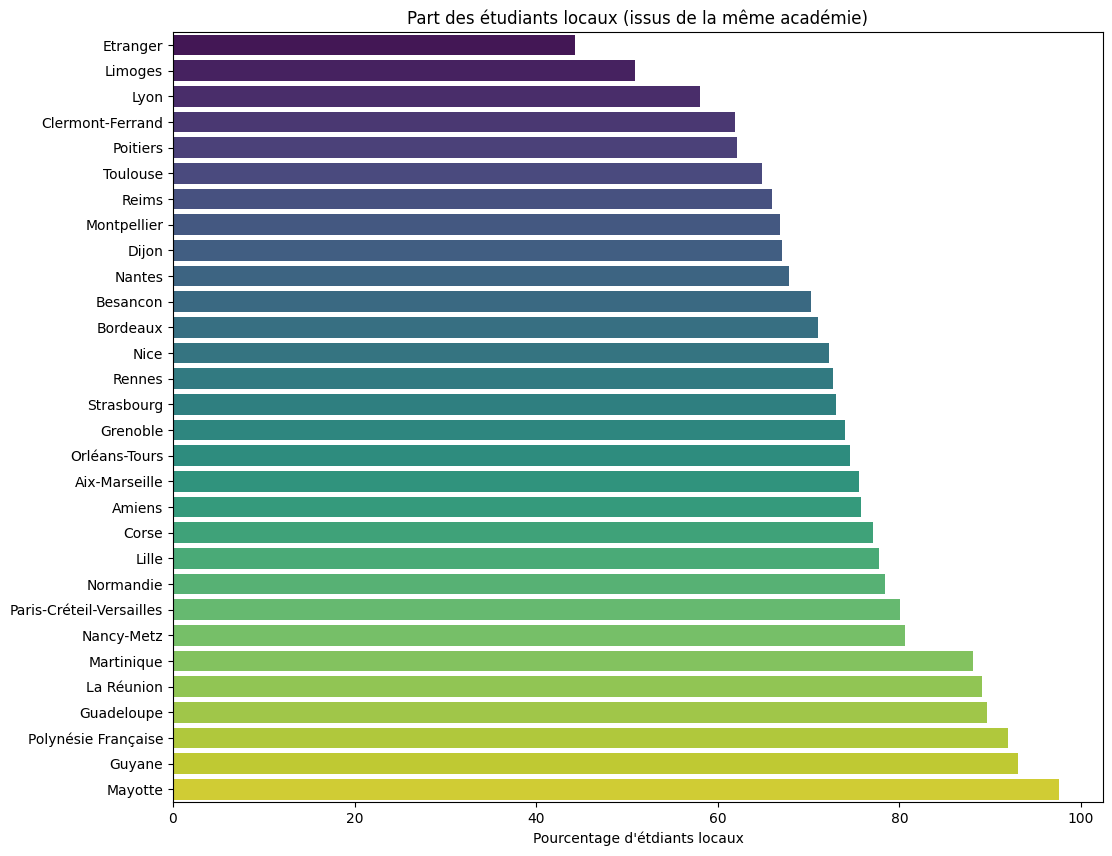

In [6]:
academies = academies.sort_values(by = "part_bac_ac_pcv", ascending=True)

plt.figure(figsize=(12,10))
sns.barplot(
    data=academies,
    x="part_bac_ac_pcv",
    y="academie_pcv",
    palette="viridis",
)

plt.title("Part des étudiants locaux (issus de la même académie)")
plt.xlabel("Pourcentage d'étdiants locaux")
plt.ylabel("")
plt.show()

On calcule cette fois-ci le taux d'entrant.

In [7]:
academies["taux_entrants"] = 100 - academies["part_bac_ac_pcv"]

#tri pour connaître les académies les plus attractives
academies=academies.sort_values(by="taux_entrants", ascending=True)

/tmp/ipykernel_10521/3091903523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


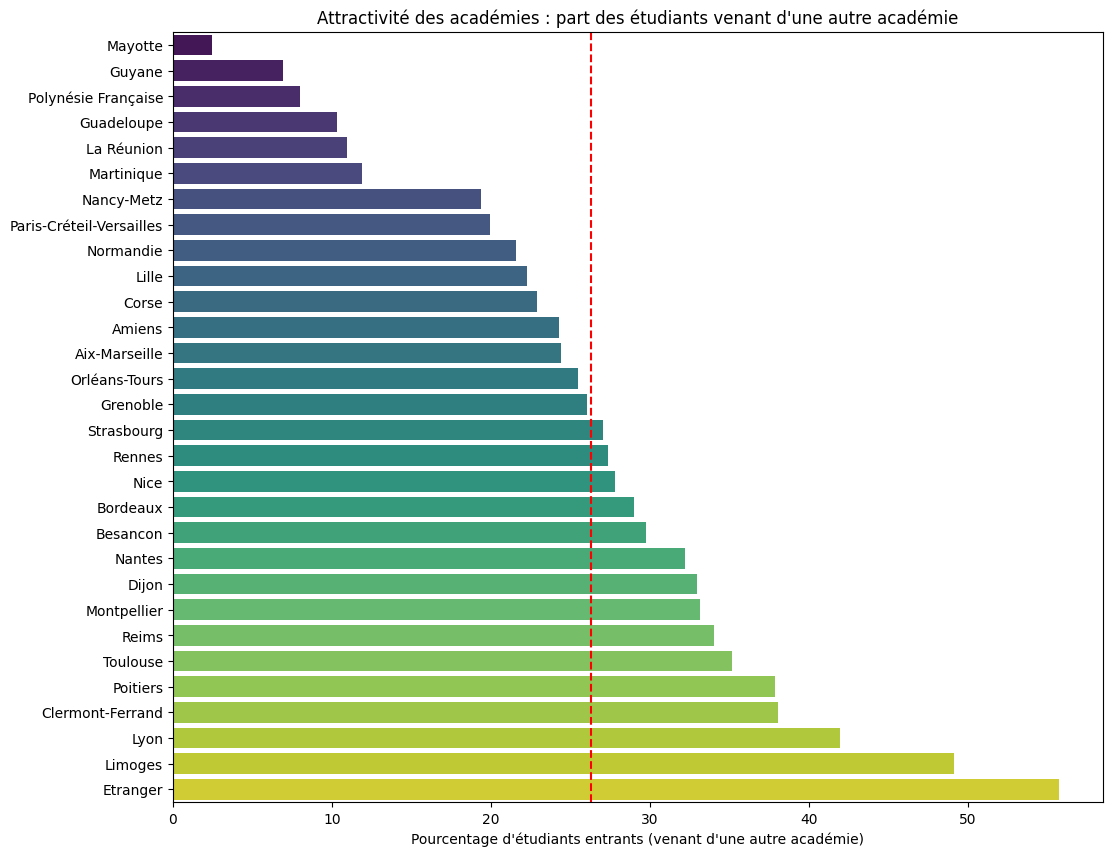

In [8]:
plt.figure(figsize=(12,10))
sns.barplot(
    data=academies,
    x="taux_entrants",
    y="academie_pcv",
    palette="viridis"
)

plt.title("Attractivité des académies : part des étudiants venant d'une autre académie")
plt.xlabel("Pourcentage d'étudiants entrants (venant d'une autre académie)")
plt.ylabel("")

moyenne_nationale = academies["taux_entrants"].mean()
plt.axvline(x=moyenne_nationale, color="red", linestyle="--", label = f"Moyenne nationale ({moyenne_nationale:.1f}%)")

### Excellence scolaire: qui sont les élèves mobiles ?

On pourrait s'intéresser à l'effet de "brain drain" ou fuite des cerveaux, qui pourrait encourage les meilleurs élèves à quitter leur académie pour accéder aux filières les plus prestigieuses. 

Pour visualiser cela, nous croisons le type de filière avec niveau d'excellence de la formation, qui est calculé à partir de la part d'étudiant ayant eu une mention très bien au bac. 

/tmp/ipykernel_10521/1989462573.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_excellence = df.pivot_table(


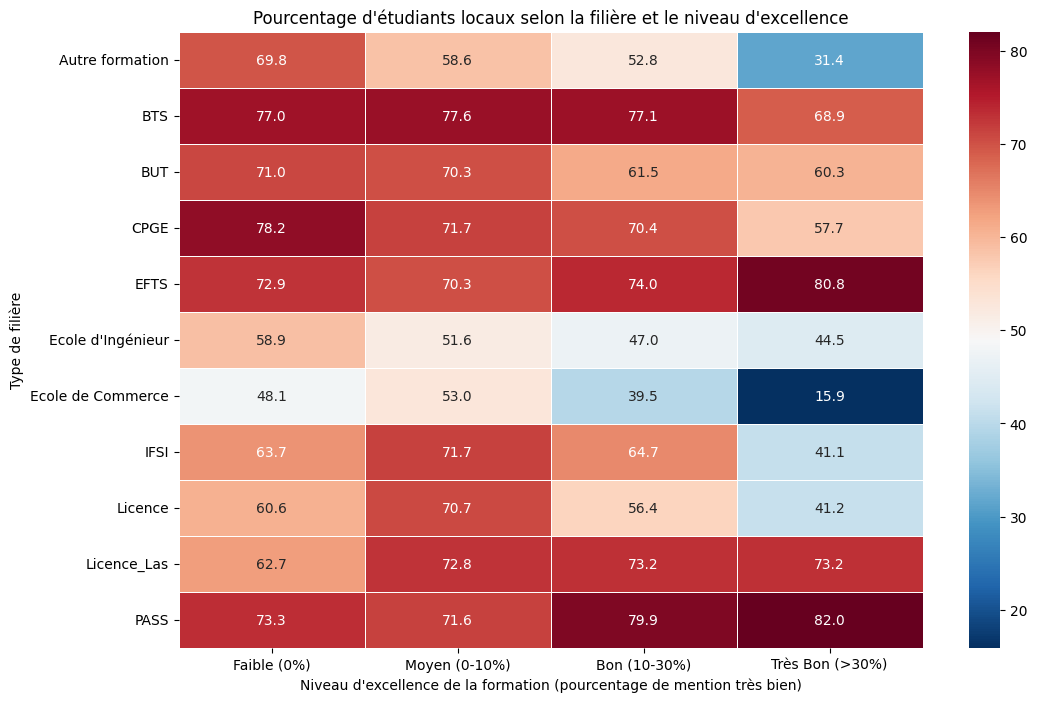

In [13]:
pivot_excellence = df.pivot_table(
    index="filiere_agr",
    columns="niveau_formation",
    values="part_bac_ac",
    aggfunc="mean"
)

plt.figure(figsize=(12,8))

sns.heatmap(
    pivot_excellence,
    annot=True,
    fmt=".1f",
    cmap="RdBu_r",
    linewidths=.5
)

plt.title("Pourcentage d'étudiants locaux selon la filière et le niveau d'excellence")
plt.xlabel("Niveau d'excellence de la formation (pourcentage de mention très bien)")
plt.ylabel("Type de filière")

plt.show()

A décrire